<a href="https://colab.research.google.com/github/AKHIL-75/AIML-2025_B16/blob/main/LAB_EXAM_1065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model  import LinearRegression

In [12]:
file_path = '/content/hw_200.csv'
data = pd.read_csv(file_path)
data.columns = ['Index', 'Height_Inches', 'Weight_Pounds']
data = data[['Index','Height_Inches', 'Weight_Pounds']]

In [13]:
data.head()

,Index,Height_Inches,Weight_Pounds
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


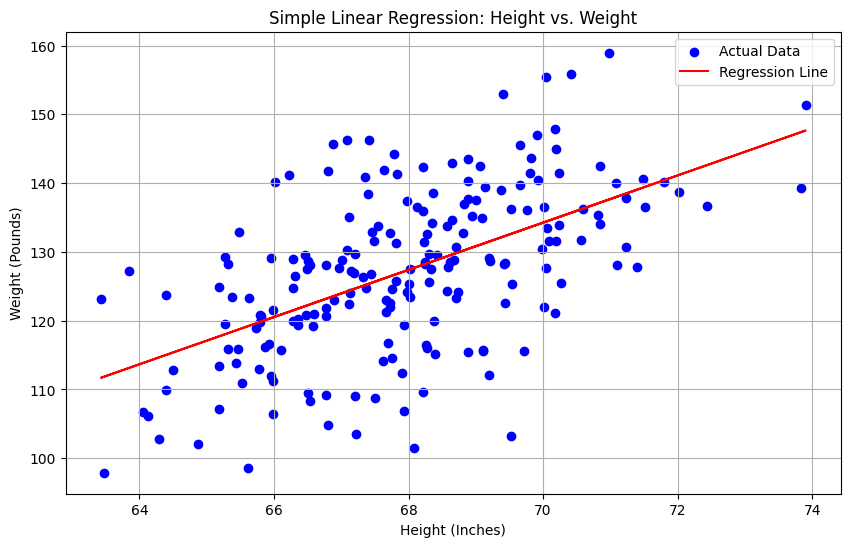

In [14]:
X = data['Height_Inches'].values.reshape(-1, 1)
y = data['Weight_Pounds'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')
plt.title('Simple Linear Regression: Height vs. Weight')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from sklearn.metrics import r2_score
data.columns = ['Index', 'Height', 'Weight']
X = data['Height'].values.reshape(-1, 1)
y = data['Weight'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
r_squared

0.31009833265482645

In [18]:
data['Height_Squared'] = data['Height'] ** 2
data['Log_Height'] = np.log(data['Height'])
X_multiple = data[['Height', 'Height_Squared', 'Log_Height']]
y = data['Weight']
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)
y_pred_multiple = model_multiple.predict(X_multiple)
r_squared_multiple = r2_score(y, y_pred_multiple)
r_squared_multiple

0.3120183021762528

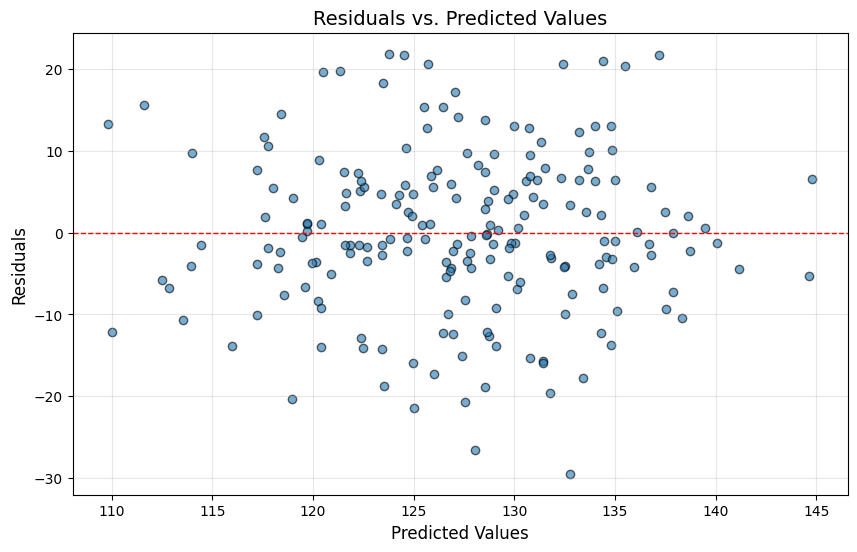

In [19]:
residuals = y - y_pred_multiple
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_multiple, residuals, alpha=0.6, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title('Residuals vs. Predicted Values', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
file_path = '/content/hw_200.csv'
data = pd.read_csv(file_path)
data.columns = ['Index', 'Height_Inches', 'Weight_Pounds']
data = data[['Height_Inches', 'Weight_Pounds']]
X = data['Height_Inches'].values.reshape(-1, 1)
y = data['Weight_Pounds'].values
model_no_scaling = LinearRegression()
model_no_scaling.fit(X, y)
y_pred_no_scaling = model_no_scaling.predict(X)
r2_no_scaling = r2_score(y, y_pred_no_scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model_with_scaling = LinearRegression()
model_with_scaling.fit(X_scaled, y)
y_pred_with_scaling = model_with_scaling.predict(X_scaled)
r2_with_scaling = r2_score(y, y_pred_with_scaling)
print("R-squared without scaling:", r2_no_scaling)
print("R-squared with scaling:", r2_with_scaling)
print("Mean Squared Error without scaling:", mean_squared_error(y, y_pred_no_scaling))
print("Mean Squared Error with scaling:", mean_squared_error(y, y_pred_with_scaling))

R-squared without scaling: 0.31009833265482645
R-squared with scaling: 0.31009833265482645
Mean Squared Error without scaling: 98.20696539439301
Mean Squared Error with scaling: 98.20696539439301
